In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import chainer.optimizers as Opt
import chainer.functions as F
import chainer.links as L
from chainer import Variable,Chain,config

In [3]:
import numpy as np
import matplotlib.pyplot as plt

D = 100
N = 2
xdata = np.random.randn(D * N).reshape(D, N).astype(np.float32)

def f(x):
    y = x * x
    return y

tdata = (xdata[:, 1] > f(xdata[:, 0])).astype(np.int32)

In [4]:
C = 2
NN = Chain(l1 = L.Linear(N, C))

In [5]:
def model(x): 
    y = NN.l1(x)
    return y

In [6]:
ydata = model(xdata)
print(ydata)

variable([[ 0.40457797 -0.10856972]
          [-1.3047737   1.7790747 ]
          [-0.9929745   0.6648317 ]
          [ 1.2083898  -1.6649114 ]
          [-0.704111    0.5192141 ]
          [-0.30989555  0.38458633]
          [-0.6431762  -0.25103128]
          [ 2.564841   -2.806568  ]
          [-0.87856764  1.6339803 ]
          [-1.2157676   0.60084367]
          [-0.08095599 -0.7347476 ]
          [-0.7299032  -0.71454567]
          [-0.93217975  0.19822353]
          [ 1.8341451   0.65171915]
          [-1.7108173   1.2231872 ]
          [-0.6464376  -0.3020497 ]
          [ 0.69047254 -0.7389856 ]
          [-1.8900936  -0.12071937]
          [-0.27767763  0.6357489 ]
          [ 0.06203686 -0.77769005]
          [ 1.4002441  -0.12087978]
          [ 0.45911235 -0.54676014]
          [ 0.92694056 -0.7427497 ]
          [ 0.01277181  0.37199083]
          [ 1.4052143  -0.3420391 ]
          [-0.30043864 -0.70352024]
          [-0.30648202  0.13559733]
          [ 1.6474378  -1.16

In [7]:
acc = F.accuracy(ydata, tdata)
print(acc)

variable(0.59)


In [8]:
optNN = Opt.SGD()
optNN.setup(NN)

In [9]:
loss_series = []
acc_series = []

In [10]:
T = 500
for time in range(T):
    config.train = True
    optNN.target.zerograds()
    ydata = model(xdata)
    loss = F.softmax_cross_entropy(ydata, tdata)
    acc = F.accuracy(ydata, tdata)
    loss.backward()
    optNN.update()
    
    loss_series.append(loss.data)
    acc_series.append(acc.data)

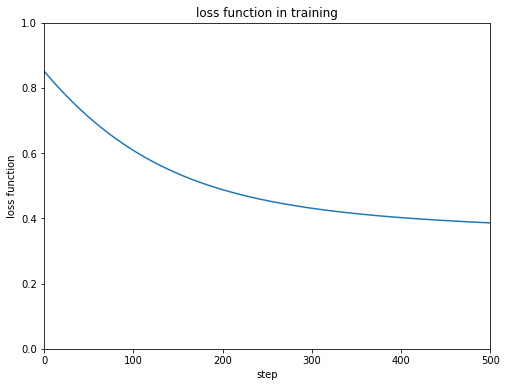

In [11]:
Tall = len(loss_series)
plt.figure(figsize = (8,6))
plt.plot(range(Tall), loss_series)
plt.title("loss function in training")
plt.xlabel("step")
plt.ylabel("loss function")
plt.xlim([0, Tall])
plt.ylim([0, 1])
plt.show()

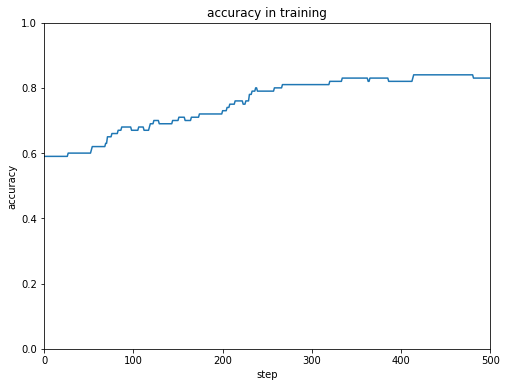

In [12]:
plt.figure(figsize=(8,6))
plt.plot(range(Tall),acc_series)
plt.title("accuracy in training")
plt.xlabel("step")
plt.ylabel("accuracy")
plt.xlim([0,Tall])
plt.ylim([0,1])
plt.show()